In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [2]:
df_train = pd.read_csv('../Titanic_ML/train.csv')
df_test = pd.read_csv('../Titanic_ML/test.csv')

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_test.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

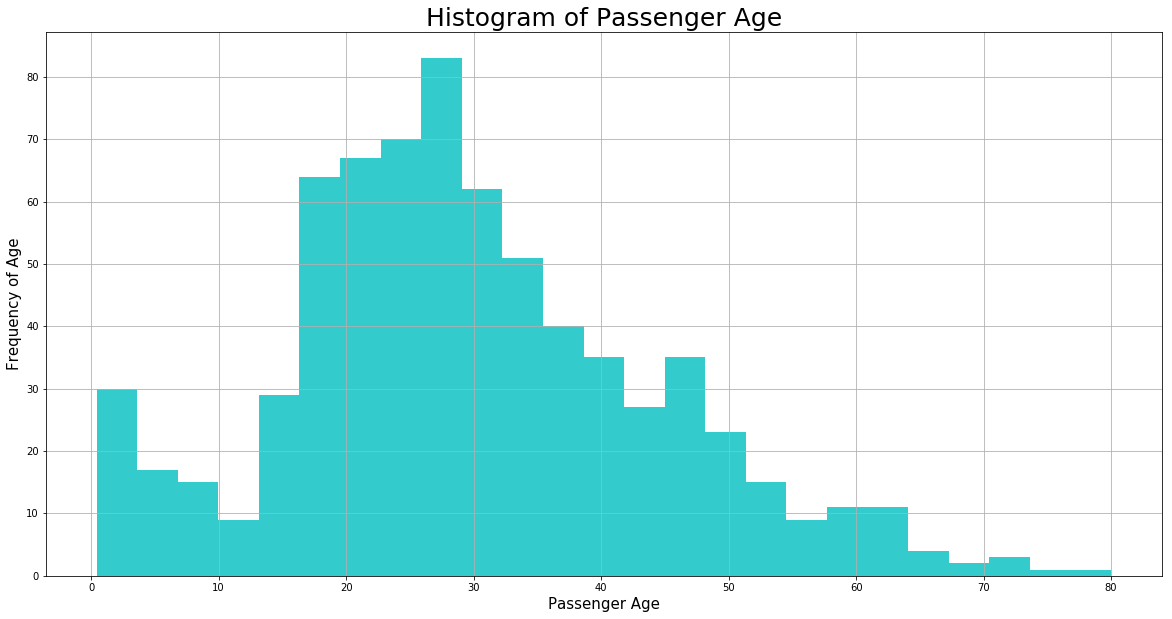

In [7]:
plt.figure(figsize=(20,10))
df_train["Age"].hist(bins=25, color='c', alpha=0.8)
plt.ylabel("Frequency of Age", fontsize = 15)
plt.xlabel("Passenger Age", fontsize = 15)
plt.title('Histogram of Passenger Age', fontsize = 25)
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


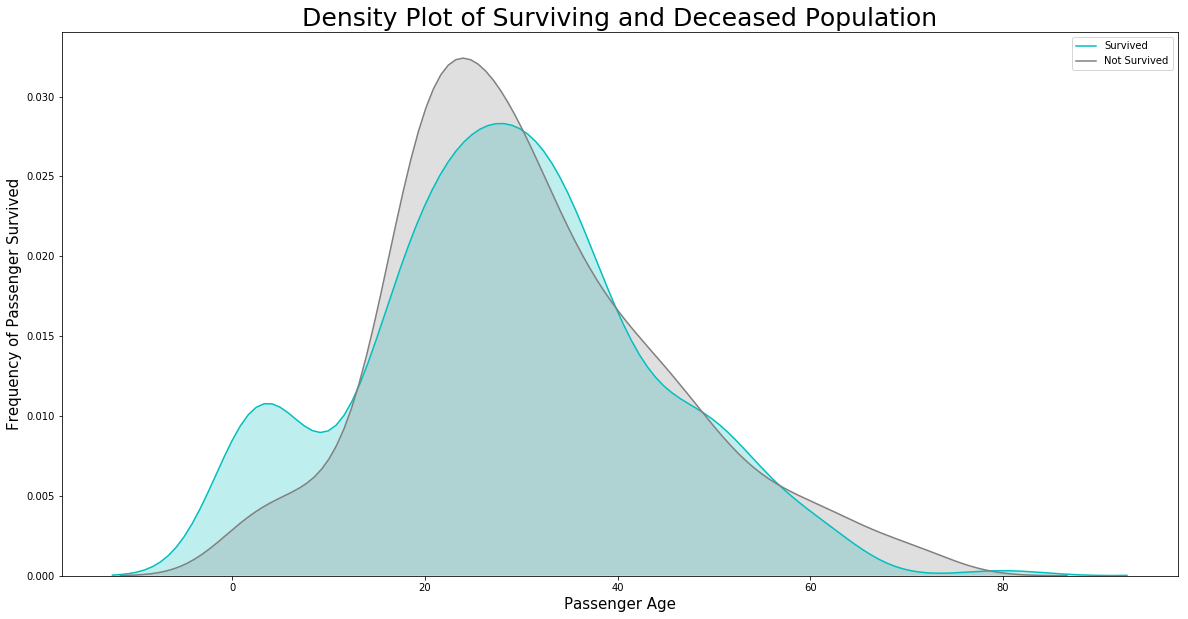

In [8]:
plt.figure(figsize=(20,10))
sns.kdeplot(df_train["Age"][df_train.Survived == 1], 
            shade=True, 
            color = "c")
sns.kdeplot(df_train["Age"][df_train.Survived == 0], 
            shade=True, 
            color = "gray")
plt.legend(['Survived', 'Not Survived'])
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Age", fontsize = 15)
plt.title('Density Plot of Surviving and Deceased Population', fontsize = 25)
plt.show()

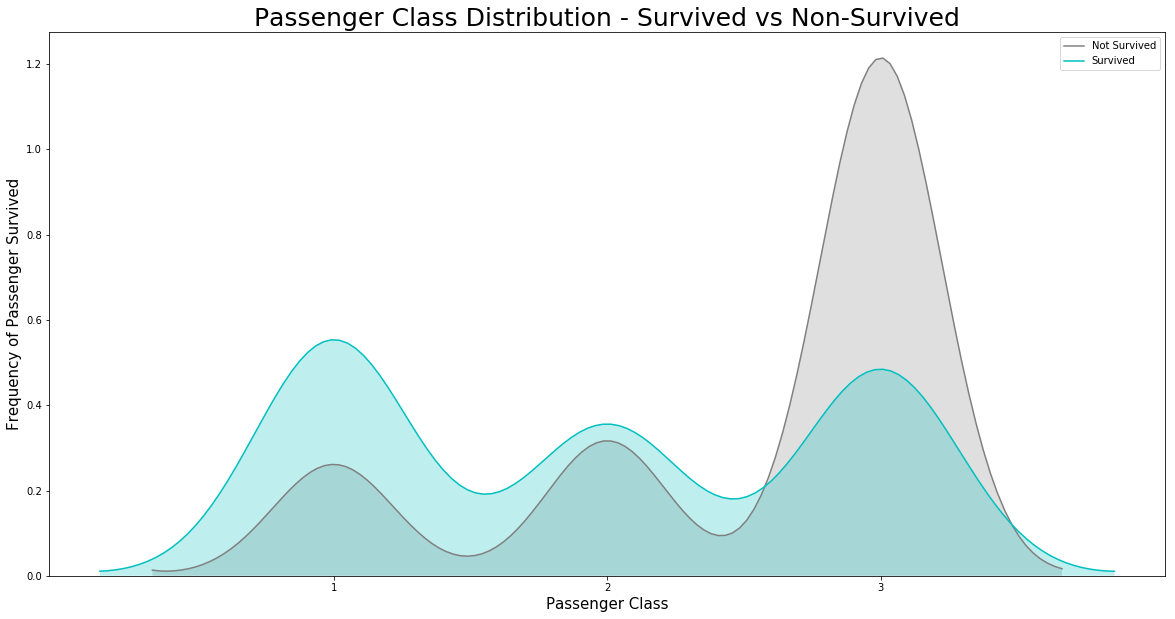

In [9]:
plt.figure(figsize=(20,10),)
sns.kdeplot(df_train.Pclass[df_train.Survived == 0] , 
               color='gray',
               shade=True,
               label='Not Survived')
sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Pclass'] , 
               color='c',
               shade=True, 
               label='Survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
labels = ['1', '2', '3']
plt.xticks(sorted(df_train.Pclass.unique()), labels);
plt.show()

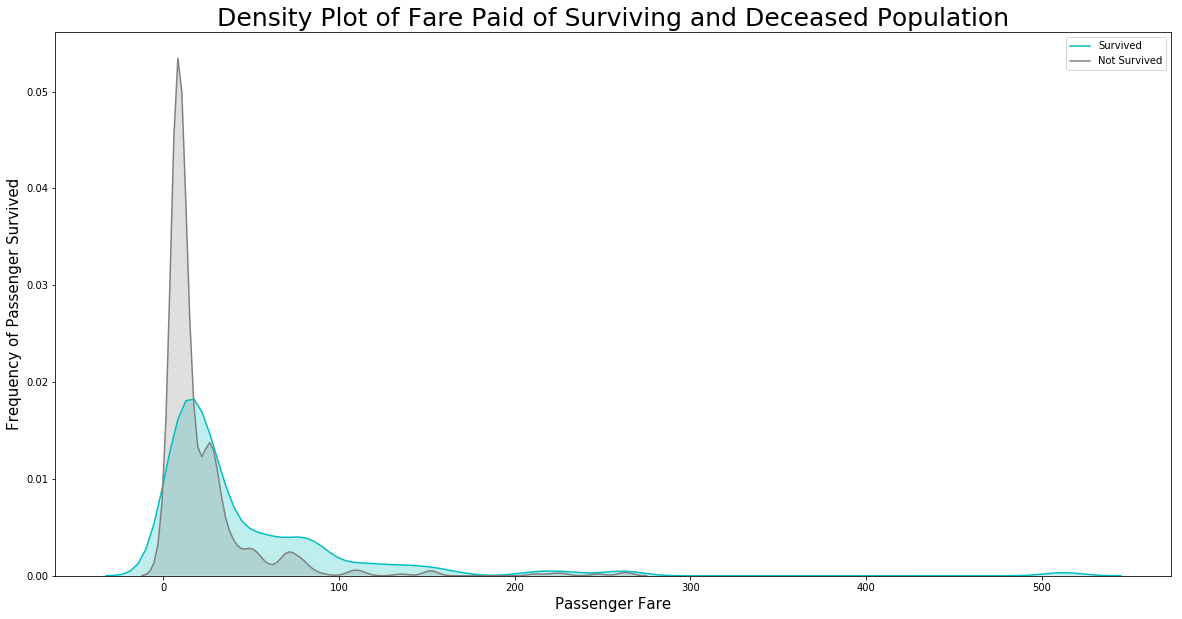

In [10]:
plt.figure(figsize=(20,10))
sns.kdeplot(df_train["Fare"][df_train.Survived == 1], 
            shade=True, 
            color = "c")
sns.kdeplot(df_train["Fare"][df_train.Survived == 0], 
            shade=True,
            color = "gray")
plt.legend(['Survived', 'Not Survived'])
plt.title('Density Plot of Fare Paid of Surviving and Deceased Population', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Fare", fontsize = 15)
plt.show()

In [11]:
df_train["Age"].median(skipna=True)

28.0

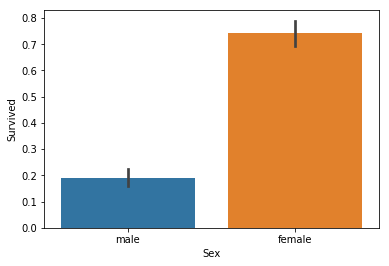

In [12]:
sns.barplot(x='Sex', y='Survived', data=df_train)

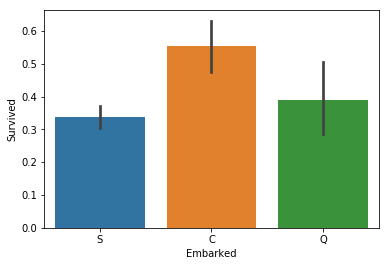

In [13]:
sns.barplot(x='Embarked', y='Survived', data=df_train)

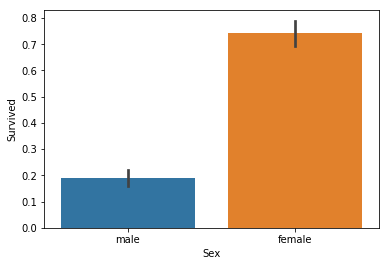

In [14]:
sns.barplot(x='Sex', y='Survived', data=df_train)

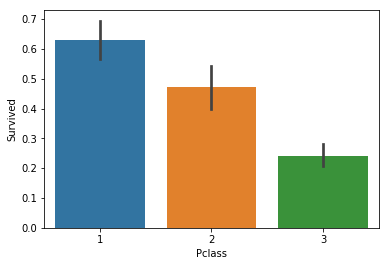

In [15]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

In [16]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_train['Embarked'].fillna("S", inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


According to the Kaggle data dictionary, both SibSp and Parch describe if a passenger was traveling with family or not. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone. This will be done by combining the two variables into one and then deleting the original two variables.

In [18]:
df_train['New']=df_train["SibSp"]+df_train["Parch"]
df_train['TravelAlone']=np.where(df_train['New']>0, 0, 1)
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,New,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [19]:
df_train.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)
df_train.drop('New', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_train.drop('PassengerId',axis=1, inplace=True)
df_train.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


The next step is to create categorical variables for Pclass and Sex and Embarked. Here we can see that the min is 1 and the max is 3. I will create 3 new categorical dummy variables to represent this range, with the same for sex. 

In [20]:
df_train = pd.get_dummies(df_train, columns=["Pclass"])
df_train = pd.get_dummies(df_train, columns=["Sex"])
df_train = pd.get_dummies(df_train, columns=["Embarked"])

In [21]:
df_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,0,1,0,0,1


The next step is to do the same for the test data. 

In [22]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Will take the median value and substitute it for all missing Age values and will drop the Cabin variable. Here the Embarked variable has no missing values. In addition, categorical dummy variables will be created for Travelling Alone, PClass, Sex and Embarked.

In [23]:
pd.isnull(df_test).sum() > 0

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [24]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Embarked'].fillna("S", inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_test['Fare'].fillna(1, inplace=True)

In [25]:
df_test['New']=df_test["SibSp"]+df_test["Parch"]
df_test['TravelAlone']=np.where(df_test['New']>0, 0, 1)

df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)
df_test.drop('New', axis=1, inplace=True)

df_test = pd.get_dummies(df_test, columns=["Pclass"])
df_test = pd.get_dummies(df_test, columns=["Embarked"])
df_test=pd.get_dummies(df_test, columns=["Sex"])

In [26]:
df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

In [27]:
df_test.head(10)

,PassengerId,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,34.5,7.8292,1,0,0,1,0,1,0,0,1
1,893,47.0,7.0000,0,0,0,1,0,0,1,1,0
2,894,62.0,9.6875,1,0,1,0,0,1,0,0,1
3,895,27.0,8.6625,1,0,0,1,0,0,1,0,1
4,896,22.0,12.2875,0,0,0,1,0,0,1,1,0
5,897,14.0,9.2250,1,0,0,1,0,0,1,0,1
6,898,30.0,7.6292,1,0,0,1,0,1,0,1,0
7,899,26.0,29.0000,0,0,1,0,0,0,1,0,1
8,900,18.0,7.2292,1,0,0,1,1,0,0,1,0
9,901,21.0,24.1500,0,0,0,1,0,0,1,0,1


In [28]:
df_train.head(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,0,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,0,1,0,0,1
5,0,28.0,8.4583,1,0,0,1,0,1,0,1,0
6,0,54.0,51.8625,1,1,0,0,0,1,0,0,1
7,0,2.0,21.0750,0,0,0,1,0,1,0,0,1
8,1,27.0,11.1333,0,0,0,1,1,0,0,0,1
9,1,14.0,30.0708,0,0,1,0,1,0,1,0,0


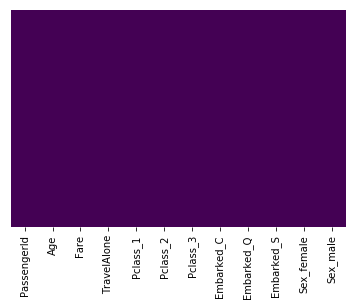

In [32]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

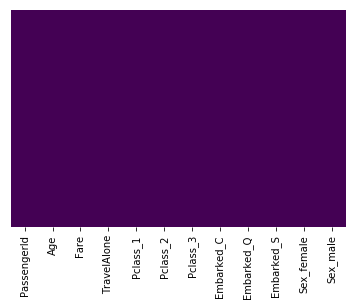

In [44]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Modelling

In [33]:
X = df_train[['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

y = df_train['Survived']

X2 = df_test[['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred = logmodel.predict(X_test)

In [37]:
from sklearn import metrics

In [38]:
metrics.accuracy_score(y_test, y_pred)

0.7910447761194029

In [39]:
y_pred2 = logmodel.predict(X2)

In [40]:
test_PassengerId = pd.read_csv('../Titanic_ML/gender_submission.csv')['PassengerId']

In [41]:
submission = pd.concat([pd.DataFrame(test_PassengerId), pd.DataFrame(y_pred2)], axis=1)

In [42]:
submission.to_csv('submission.csv', index=False)